In [1]:
import neurolab as nl
import numpy as np
from numpy import genfromtxt

In [2]:
my_data = genfromtxt('sector8TS.csv', delimiter=',')
#print my_data

data = my_data[:100]

#print data

continuar = True
index = 0
auxIndex = 1
datos80 = data[:81]

print datos80

inputArrayAux = []
inputArray = []
targetArray = []

while index < len(datos80) - 1:
    inputArrayAux.append( datos80[ index ] )
    if auxIndex == 5:
        inputArray.append( inputArrayAux )
        inputArrayAux = []
        targetArray.append( datos80[ index + 1] )
        index = index - 4
        auxIndex = 0
    auxIndex+=1
    index+=1

[ 0.21755263  0.21168112  0.1810878   0.18139689  0.16563669  0.10352298
  0.0936341   0.08868985  0.0936341   0.20673669  0.48485779  0.67058094
  0.69128558  0.77317667  0.5877626   0.43881336  0.41841781  0.45982689
  0.43912244  0.38195298  0.43325094  0.43356002  0.35661318  0.19623001
  0.13473429  0.1093943   0.05191594  0.04202725  0.07323856  0.09826946
  0.21199021  0.34579724  0.55716928  0.69592093  0.85568593  0.83034613
  0.69622983  0.62917186  0.61835592  0.65451166  0.67552538  0.44839315
  0.44406669  0.44375779  0.5         0.52132262  0.30469724  0.20673669
  0.14462297  0.05747836  0.02101372  0.01112484  0.04758967  0.05778745
  0.20673669  0.36093945  0.58281835  0.62391834  0.6752163   0.62391834
  0.56180463  0.47435112  0.5466626   0.54758967  0.4749691   0.45395557
  0.44901113  0.37669964  0.50556242  0.55222502  0.29913482  0.2527813
  0.17583446  0.06211371  0.01606928  0.03646483  0.05840543  0.04697169
  0.14462297  0.30407907  0.54140908]


In [3]:
inp = np.array( inputArray )
#print inp

target = np.array( targetArray )
lenT = len(target)
tar = target.reshape(lenT, 1);

#print tar

In [14]:
# Create network with 2 layers and random initialized
#
net = nl.net.newff([ [0, 1], [0,1] , [0, 1], [0, 1], [0, 1] ],[50, 1])
print net

In [15]:
# Train network
error = net.train(inp, tar, epochs=1500, show=100, goal=0.002)
#print error

Epoch: 100; Error: 0.0461108281822;
Epoch: 200; Error: 0.0291439996083;
Epoch: 300; Error: 0.0187813327503;
Epoch: 400; Error: 0.00743025802692;
Epoch: 500; Error: 0.00395815106651;
Epoch: 600; Error: 0.00203370067674;
The goal of learning is reached


In [11]:
# Simulate network
out = net.sim(inp)
#print out[0,0]
#a = []
#b = []
#for i in range(len(out)):
    #a.append(out[i,0])
    #b.append(tar[i,0])
    
    
#print out

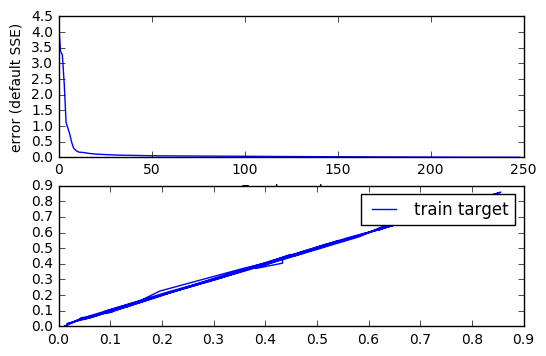

In [8]:
import pylab as pl
pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('error (default SSE)')

'''
#150 = numero de puntos de entrada
x2 = np.linspace(-20.0,20.0,150)
y2 = net.sim(x2.reshape(x2.size,1)).reshape(x2.size)

y3 = out.reshape(size)
'''

#Graficar el target con el out

#y2 = net.sim( inp )

#print a

pl.subplot(212)
pl.plot(tar, out)
#pl.plot(a,b)
pl.legend(['train target', 'net output'])
pl.show()